In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


df = pd.read_csv('C:\\Users\\kathr\\PIDS_Assigns\\Lab_01\\fetal_health.csv')

df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [37]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                            test_size=0.25,
                                                            random_state=42)
print("train_val: {}, test: {}".format(X_train.shape[0], X_test.shape[0]))

normalizer= StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

train_val: 1594, test: 532


In [ ]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)


grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train, y_train)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


In [39]:
def accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def classification_report(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    precision = cm[1,1]/(cm[1,1] + cm[0,1])
    recall = cm[1,1]/(cm[1,1] + cm[1,0])
    f1 = 2*(precision * recall)/(precision + recall)
    acc = accuracy_score(y_test,y_pred)
    return(precision,recall,f1,acc)

def confusion_matrix(y_test, y_pred):
    result = np.array([[0, 0], [0, 0]])
#tp,tn,fp,fn in order
    result[1,1] = np.sum(np.logical_and(y_pred == 1, y_test == 1))
    result[0,0] = np.sum(np.logical_and(y_pred == 0, y_test == 0))
    result[0,1] = np.sum(np.logical_and(y_pred == 1, y_test == 0))
    result[1,0] = np.sum(np.logical_and(y_pred == 0, y_test == 1))
    return result


precision,recall,f1,acc = classification_report(y_test, y_test_pred)
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(acc, recall, precision, f1))

accuracy: 0.921, recall: 1.000, precision: 1.000, f1: 1.000


In [40]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

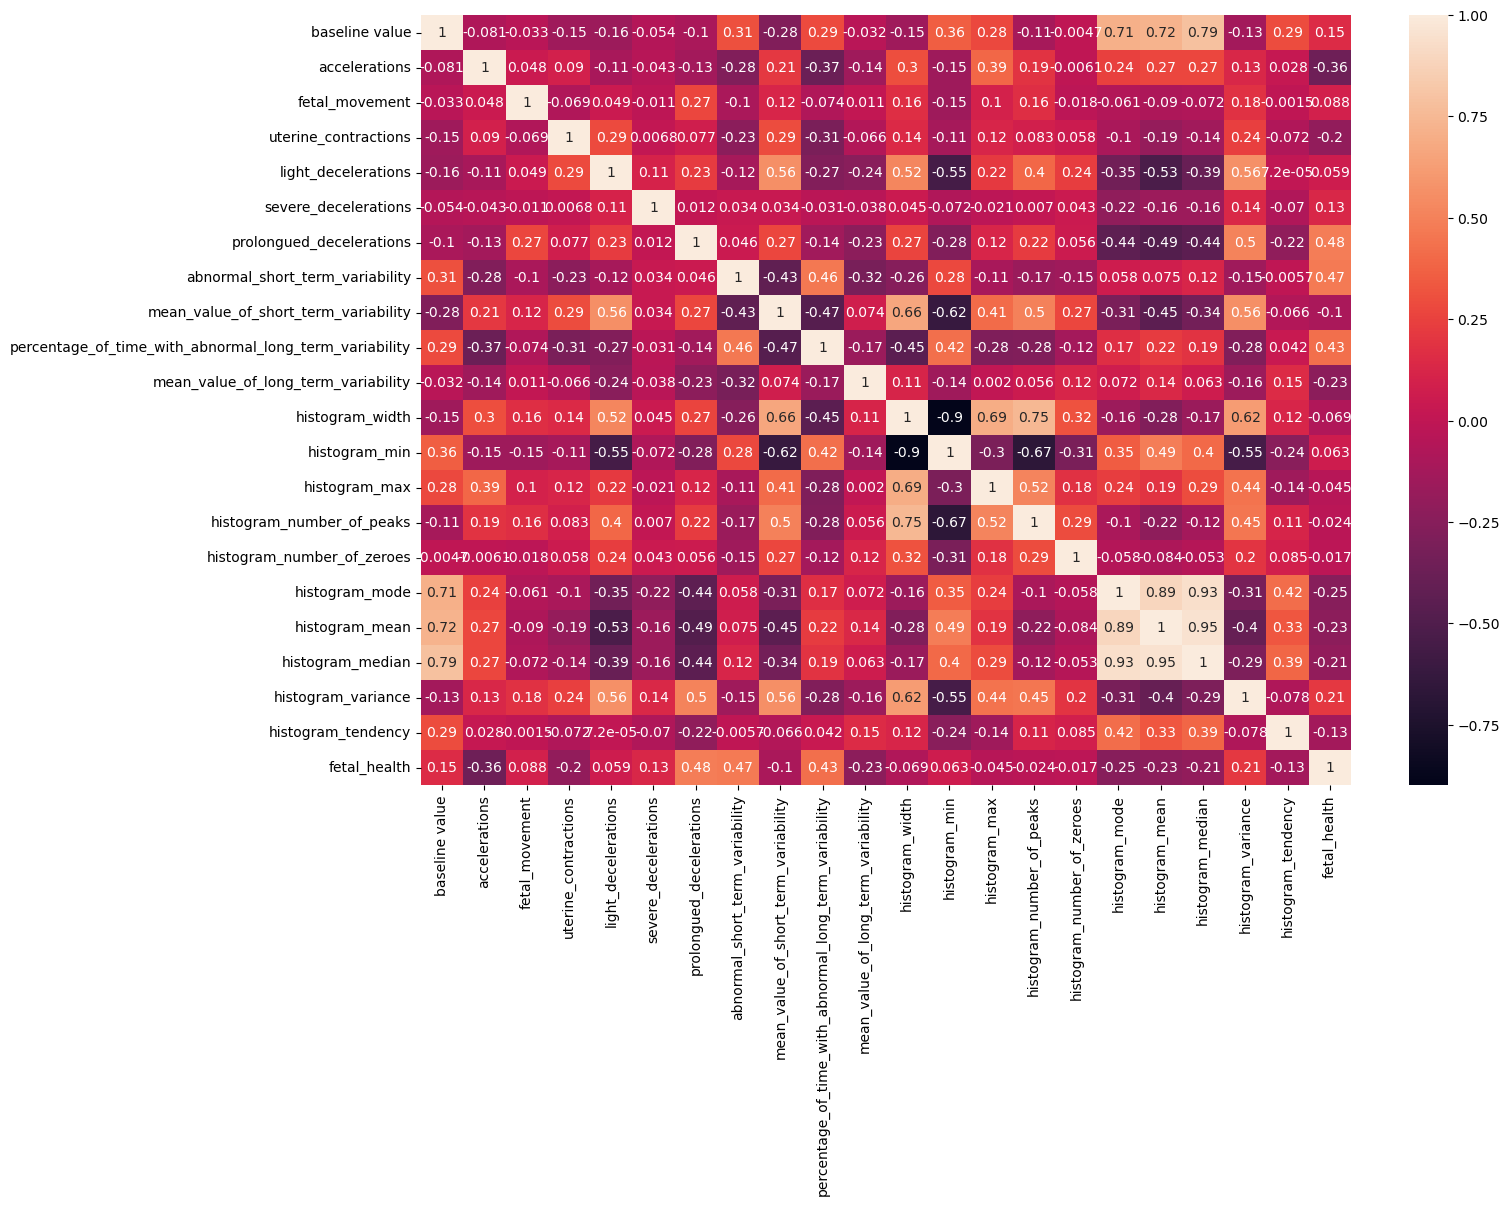

In [41]:
corr = df.corr()

plt.figure(figsize=(15,10))
sb.heatmap(corr, annot=True)
plt.show()